# Introduction to Portfolio Construction and Analysis

## Fundamentals of Return

The classic formular to calculate returns from prices are:

\begin{equation*}
R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}}
\end{equation*}

When you have to include dividends:

\begin{equation*}
R_{t,t+1} = \frac{P_{t+1}+D_{t,t+1}}{P_{t}} - 1
\end{equation*}


### Multi period returns

\begin{equation*}
R_{t,t+2} = (1+R_{t,t+1})*(1+R_{t+1,t+2}) - 1
\end{equation*}

### Annualized returns

\begin{equation*}
R_t = ((1+0.01)^2 -1 )
\end{equation*}




In [1]:
prices_a = [8.70, 8.91, 8.71]

In [2]:
8.91/8.70 - 1

0.024137931034482918

In [3]:
prices_a[:-1]

[8.7, 8.91]

In [4]:
import numpy as np

In [5]:
prices_a = np.array(prices_a)

In [6]:
type(prices_a)

numpy.ndarray

In [7]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

In [8]:
import pandas as pd
prices = pd.DataFrame({
    "BLUE": [8.70, 8.91, 8.71, 8.73, 8.43],
    "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
})

In [9]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.73,11.59
4,8.43,12.11


In [10]:
prices.iloc[1:,0]/prices.iloc[:-1,0] # Se alinea entre ambas columnas. Es debido a los indices

0    NaN
1    1.0
2    1.0
3    1.0
4    NaN
Name: BLUE, dtype: float64

In [11]:
prices.iloc[1:].values / prices.iloc[:-1] # Elimina los indices de la dataframe

,BLUE,ORANGE
0,1.024138,1.039400
1,0.977553,0.966606
2,1.002296,1.082166
3,0.965636,1.044866


In [12]:
prices.iloc[1:] / prices.iloc[:-1].values # Elimina los indices de la dataframe que tiene .values. El problema es cuando ambos tienen indice

,BLUE,ORANGE
1,1.024138,1.039400
2,0.977553,0.966606
3,1.002296,1.082166
4,0.965636,1.044866


In [13]:
prices/prices.shift(1) - 1 

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,0.002296,0.082166
4,-0.034364,0.044866


In [14]:
prices.pct_change() #Easiest way to calculate the percentage change

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,0.002296,0.082166
4,-0.034364,0.044866


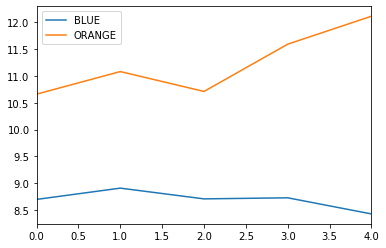

In [15]:
prices.plot()

In [46]:
%matplotlib inline

In [17]:
prices = pd.read_csv("data/sample_prices.csv")
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [19]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


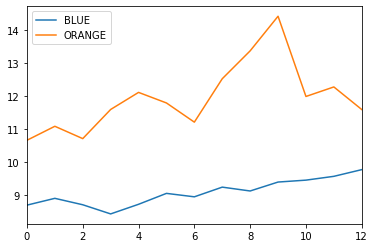

In [20]:
prices.plot()

In [21]:
%matplotlib inline

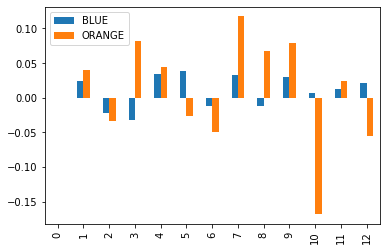

In [24]:
returns.plot.bar()

In [25]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [26]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [28]:
returns+1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [30]:
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [32]:
(returns+1).prod() - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [34]:
(((returns+1).prod() - 1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

## Annualization

In [36]:
rm = 0.01
(1+rm)**12-1

0.12682503013196977

In [37]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [39]:
rd = 0.0001
(1+rd)**252 - 1

0.025518911987694626

In [ ]:
LAb